<p align="center">
<img src="https://visme.co/blog/wp-content/uploads/climate-change-facts-header-wide.gif"> 
</p>

# <span style="color: palegreen;"> It's Only A Matter of Time* </span>

#### <span style="font-family:cursive;"> **Authors:**  [Jiji Craynock](https://github.com/DataOnATangent) & [Rafael Ferreira](https://github.com/Astroraf) </span>

<a name="overview"></a>  
## <span style="color: deepskyblue;">Overview </span>
By now most of us realize that rising CO2 levels are the main issue of climate change. Scientists warn that if we do not manage to maintain C02 levels below 450 ppm we will be unable to stabilizing the average global temperature at a 2°C increase over the pre-industrial period. They have declared that an increase of 2°C in global tempatures would have disastrous consequences and would cause major dislocations for civilizations. For our project we use weekly CO2 measurement data from NOAA to predict future CO2 levels. We tested our data using ARMA, ARIMA, and SARIMA models to find the best prediction tool. Despite highly evident seasonality, ARIMA turned out to be the best model. When applied to the full data set it, we found that CO2 levels will continue to rise at an alarming pace if continue with our current lifestyles. This should impress upon everyone the importance of taking conservation seriously and increasing our efforts to find ways to reduce CO2 emissions. In future iterations we hope to find ways to account for exogeneos variables relating to human activity with the goal of not simply showing that there will be a rise but also what factors contribute most to that trend. 

[Source](https://sustainabilityadvantage.com/2014/01/07/co2-why-450-ppm-is-dangerous-and-350-ppm-is-safe/) 

<p align="center">
  <img width="560" height="400" src="http://nerdist.com/wp-content/uploads/2014/11/NASA-CO2.gif">
</p>

<a name="btt"></a> 
## <span style="color: thistle;">Table of Contents </span>

1. [Overview](#overview) 
2. [Business Problem](#business_problem)
3. [Data_Understanding](#data_understanding) 
4. [Data Preperation](#data_preparation)
    1. [Preprocessing](#preprocessing) 
    2. [Exploratory Data Analysis](#EDA) 
    3. [Model Preperation](#model_preperation) 
5. [Data Modeling](#data_modeling)   
    1. [ARMA](#arma) 
    2. [ARIMA](#arima) 
    3. [SARIMA](#sarima) 
6. [Evaluation](#evaluation)    
7. [Conclusion](#conclusion)  

<a name="business_problem"></a>  

## <span style="color: tomato;">Business Problem</span> 

[Back to Top](#btt)  


Most of us never consider how fortunate we are that Earth is a habitable planet. We take take for granted that all the aspects that need to go right for life as we know it to exist. Chief among those is the chemical make up of Earth's atmosphere. Earth’s atmosphere is resilient to many of the changes humans have imposed on it but atmospheric scientist say that doesn’t necessarily mean that our society is. Humans have increased the amount of carbon dioxide by as much as 45% since the beginning of the Industrial Age and while our atmosphere will survive it seems unlikely that many, if any, societies will survie the impact. 

Carbon Dioxide or CO2 is one of the primary greenhouse gases on Earth. Greenhouse gases have the ability to trap heat(thermal radiation) that the Earth would otherwise emit to space.
CO2 is an important gas for life on the planet and helps maintain our atmosphere. However, sharp changes in CO2 level affect the atmospheric balance and lead to adverse effect on global climate. Currently, CO2 levels are higher than they have ever been as can be seen in the image below. Although we now understand the human activity impact on CO2 concentrations in the atmosphere, many questions remain unanswered. For our project we will be explore data containing the weekly average measurement of CO2 in part per million as collect by NOAA at Mauna Loa with the purpose of predicting future averages. Our hope is that with this information we can provide insight into how much time we have left to adress this issue and highlist the need for swift action before it is too late.

<p align="center">
  <img width="760" height="600" src="https://climate.nasa.gov/system/resources/detail_files/24_co2-graph-061219-768px.jpg">
</p>


[Source](https://climate.nasa.gov/news/2915/the-atmosphere-getting-a-handle-on-carbon-dioxide/)  

<a name="data_understanding"></a> 
## <span style="color: gold;">Data Understanding</span> 
[Back to Top](#btt) 

As previously stated, the data used for this project is weekly CO2 measurement data collect by NOAA in Mauna Loa, Hawaii. The data contains records dating back to the week of May 19th, 1974 through January 24th, 2021. It describe the measurements in ppms of CO2, the data collected, the number of days in a given week used for the average, the differnce in average versus 1-year and 10 years ago, and the increase since the year 1800. Our target variable will be the weekly average.


[Link to Data](https://www.esrl.noaa.gov/gmd/ccgg/trends/weekly.html)  


<a name="data_preparation"></a>  
## <span style="color: palegreen;"> Data Preparation </span> 

[Back to Top](#btt) 

Our data is largely complete in terms of our target variable. However, since we wish to confirm that our averages are at least largely representive we will also be looking at the ndays column which describes the number of days per week used for the average. We will also maintain the increase since 1800 column in order to have a deep understanding of scale as we explore the data.

<a name="preprocessing"></a> 
### <span style="color: deepskyblue;">Preprocessing </span>  

[Back to Top](#btt) 

In this section we will take care to clean up and drop the required data for use in our data exploration and modeling process. 

In [1]:
#Import necessary packages
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme(style="dark")
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf 
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
import pmdarima as pm
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
sm.tsa.statespace.SARIMAX 

statsmodels.tsa.statespace.sarimax.SARIMAX

In [2]:
#Load data and print summary statistics
weekly = pd.read_csv('co2_weekly_mlo.csv') 
weekly.describe()

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
count,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000
mean,1997.259730,6.535846,15.719787,1997.760793,357.912372,5.868906,327.778267,57.278693,79.991254
std,13.510793,3.451129,8.802066,13.507458,119.562459,1.372752,229.377689,564.495447,96.204762
min,1974.000000,1.000000,1.000000,1974.379500,-999.990000,0.000000,-999.990000,-999.990000,-999.990000
25%,1986.000000,4.000000,8.000000,1986.069900,346.980000,5.000000,345.490000,331.190000,66.900000
50%,1997.000000,7.000000,16.000000,1997.760300,364.870000,6.000000,363.120000,349.780000,84.130000
75%,2009.000000,10.000000,23.000000,2009.450700,387.580000,7.000000,385.760000,368.130000,107.690000
max,2021.000000,12.000000,31.000000,2021.141100,417.670000,7.000000,415.530000,393.670000,136.490000


In [3]:
#Takes a look at the last 5 columns in our data set
weekly.tail()

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
2436,2021,1,24,2021.0644,416.01,7,413.96,391.68,135.50
2437,2021,1,31,2021.0836,417.12,7,414.50,392.19,136.49
2438,2021,2,7,2021.1027,416.92,7,414.91,391.64,136.18
2439,2021,2,14,2021.1219,416.51,7,414.12,391.92,135.67
2440,2021,2,21,2021.1411,416.31,7,413.96,392.32,135.36


In [4]:
#Takes a look at the first 5 columns in our data set
weekly.head()

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
0,1974,5,19,1974.3795,333.37,5,-999.99,-999.99,50.40
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.35,5,-999.99,-999.99,49.60
3,1974,6,9,1974.4370,332.20,7,-999.99,-999.99,49.65
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.06


In [5]:
#Check data for null values 
weekly.isna().sum()

year                   0
month                  0
day                    0
decimal                0
average                0
ndays                  0
1 year ago             0
10 years ago           0
increase since 1800    0
dtype: int64

In [6]:
#Make inital changes to data including: 
weekly['Date'] = pd.to_datetime(weekly[['year', 'month', 'day']])  #Creating a data column
weekly['average'] = weekly['average'].abs()  #Making all numbers in average column positive by changing them to absolute values
weekly['increase since 1800'] = weekly['increase since 1800'].abs()  #Making all numbers in increase since 1800 column positive by changing them to absolute values
weekly.drop(columns = ['decimal', '1 year ago', '10 years ago'], inplace = True) #Dropping unneeded columns 

>We started out prepocessing by looking at the data, adding a data column, changing out average to absolute values, and dropping columns we will not be using. Having completed initial clean up, we now move on addressing the missing values in our averages column and increase since 1800 column. We discovered that while there are no missing values, the data collectors have filled in missing values with 999.99. These values will be addressed by using the average of the values for the index rows before and after the missing value(s).

In [7]:
#Look at which rows have 999.99 values or above the mean values for the increase since 1800 column
weekly1 = weekly[weekly['increase since 1800']> 500] 
weekly1

,year,month,day,average,ndays,increase since 1800,Date
72,1975,10,5,999.99,0,999.99,1975-10-05
81,1975,12,7,999.99,0,999.99,1975-12-07
82,1975,12,14,999.99,0,999.99,1975-12-14
83,1975,12,21,999.99,0,999.99,1975-12-21
84,1975,12,28,999.99,0,999.99,1975-12-28
110,1976,6,27,999.99,0,999.99,1976-06-27
409,1982,3,21,999.99,0,999.99,1982-03-21
412,1982,4,11,999.99,0,999.99,1982-04-11
413,1982,4,18,999.99,0,999.99,1982-04-18
481,1983,8,7,999.99,0,999.99,1983-08-07


In [8]:
#Replace the values with the average for the rows above and below the value(s) that need to changed
inc1975=weekly.loc[[71, 73], 'increase since 1800'].mean() 
weekly.loc[[72, 81, 82, 83, 84], 'increase since 1800'] = inc1975 

inc1976=weekly.loc[[109,111], 'increase since 1800'].mean() 
weekly.loc[[110], 'increase since 1800'] = inc1976 

inc1982=weekly.loc[[411, 414], 'increase since 1800'].mean() 
weekly.loc[[409, 412, 413], 'increase since 1800'] = inc1982 

inc1983=weekly.loc[[480, 482], 'increase since 1800'].mean() 
weekly.loc[[481], 'increase since 1800'] = inc1983

inc1984=weekly.loc[[514, 519], 'increase since 1800'].mean() 
weekly.loc[[515, 516, 517, 518], 'increase since 1800'] = inc1984

inc2005=weekly.loc[[1638, 1640], 'increase since 1800'].mean() 
weekly.loc[[1639], 'increase since 1800'] = inc2005 

inc2008=weekly.loc[[1779, 1783], 'increase since 1800'].mean() 
weekly.loc[[1780, 1781, 1782], 'increase since 1800'] = inc2008

In [9]:
#Look at which rows have 999.99 values or above the mean values for the average column
weekly2 = weekly[(weekly['average']> 500) | (weekly['average'] < 175)] 
weekly2

,year,month,day,average,ndays,increase since 1800,Date
72,1975,10,5,999.99,0,51.570,1975-10-05
81,1975,12,7,999.99,0,51.570,1975-12-07
82,1975,12,14,999.99,0,51.570,1975-12-14
83,1975,12,21,999.99,0,51.570,1975-12-21
84,1975,12,28,999.99,0,51.570,1975-12-28
110,1976,6,27,999.99,0,52.050,1976-06-27
409,1982,3,21,999.99,0,61.575,1982-03-21
412,1982,4,11,999.99,0,61.575,1982-04-11
413,1982,4,18,999.99,0,61.575,1982-04-18
481,1983,8,7,999.99,0,63.685,1983-08-07


In [10]:
#Replace the values with the average for the rows above and below the value(s) that need to changed for the average column
ppm1975=weekly.loc[[71, 85], 'average'].mean() 
weekly.loc[[72, 81, 82, 83, 84], 'average'] = ppm1975  

ppm1976=weekly.loc[[109, 111], 'average'].mean() 
weekly.loc[[110], 'average'] = ppm1976  

ppm1982=weekly.loc[[408, 414], 'average'].mean() 
weekly.loc[[409, 412, 413], 'average'] = ppm1982

ppm1983=weekly.loc[[480, 482], 'average'].mean() 
weekly.loc[[481], 'average'] = ppm1983

ppm1984=weekly.loc[[514, 519], 'average'].mean() 
weekly.loc[[515, 516, 517, 518], 'average'] = ppm1984

ppm2005=weekly.loc[[1638, 1640], 'average'].mean() 
weekly.loc[[1639], 'average'] = ppm2005

ppm2008=weekly.loc[[1779, 1783], 'average'].mean() 
weekly.loc[[1780, 1781, 1782], 'average'] = ppm2008

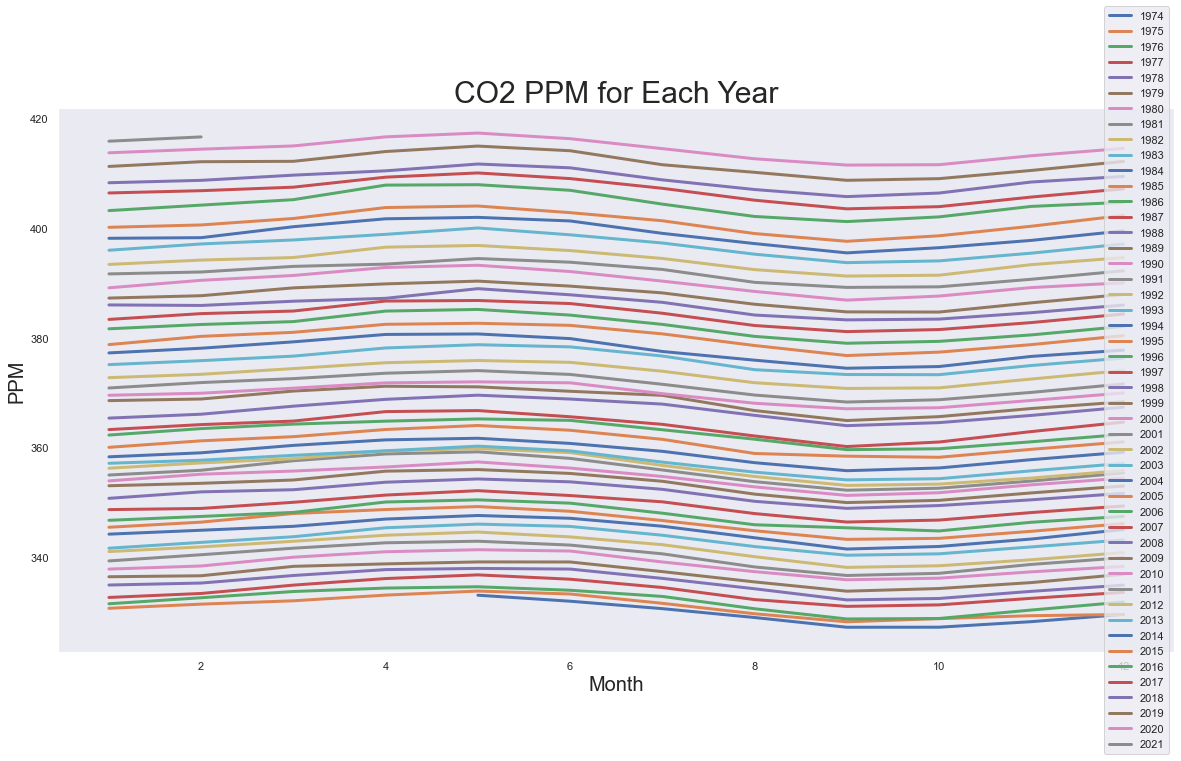

In [11]:
#Graph the average column to confirm outliers hav e been addressed
season = weekly
season['Date'] = weekly.Date
season['year'] = weekly['Date'].dt.year
season['month'] = weekly['Date'].dt.month
spivot = pd.pivot_table(season, index='month', columns = 'year', values = 'average', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.legend(loc = 'right')
plt.title('CO2 PPM for Each Year', fontsize = 30)
plt.ylabel('PPM', fontsize = 20) 
plt.xlabel('Month', fontsize = 20)
plt.show()

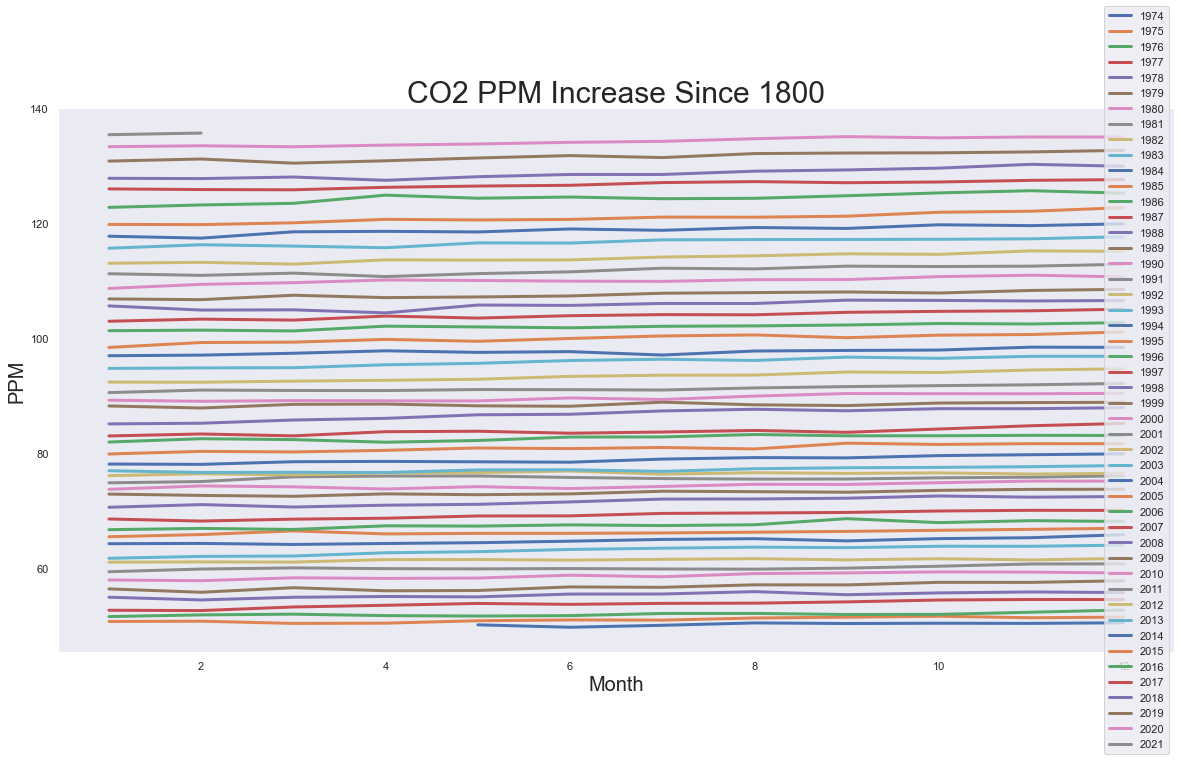

In [12]:
#Graph the increase since 1800 to confirm outliers have been addressed
season = weekly
season['Date'] = weekly.Date
season['year'] = weekly['Date'].dt.year
season['month'] = weekly['Date'].dt.month
spivot = pd.pivot_table(season, index='month', columns = 'year', values = 'increase since 1800', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.legend(loc = 'right')
plt.title('CO2 PPM Increase Since 1800', fontsize = 30)
plt.ylabel('PPM', fontsize = 20) 
plt.xlabel('Month', fontsize = 20)
plt.show()

> From the two charts above we can see that there is fairly consitent year over year growth in CO2 emissions. As a result we know that our data does not have stationarity. However this does confirm that we no longer have missing value outliers. 

In [13]:
#Rerun the summary statistics
weekly.describe()

,year,month,day,average,ndays,increase since 1800
count,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000
mean,1997.259730,6.535846,15.719787,367.860051,5.868906,87.870969
std,13.510793,3.451129,8.802066,24.439001,1.372752,24.348886
min,1974.000000,1.000000,1.000000,326.720000,0.000000,49.600000
25%,1986.000000,4.000000,8.000000,347.110000,5.000000,66.950000
50%,1997.000000,7.000000,16.000000,364.960000,6.000000,84.290000
75%,2009.000000,10.000000,23.000000,387.580000,7.000000,107.690000
max,2021.000000,12.000000,31.000000,417.670000,7.000000,136.490000


In [14]:
len(weekly['Date'])

2441

<a name="EDA"></a> 
### <span style="color: deepskyblue;">EDA</span>  

[Back to Top](#btt) 

Having confirmed that all intial issue have been addressed. We not move on to further exploratory data analysis. We saw above that our data increases rather steadily year over year, incating a lack of stationarity that will need to be addressed at a later point.

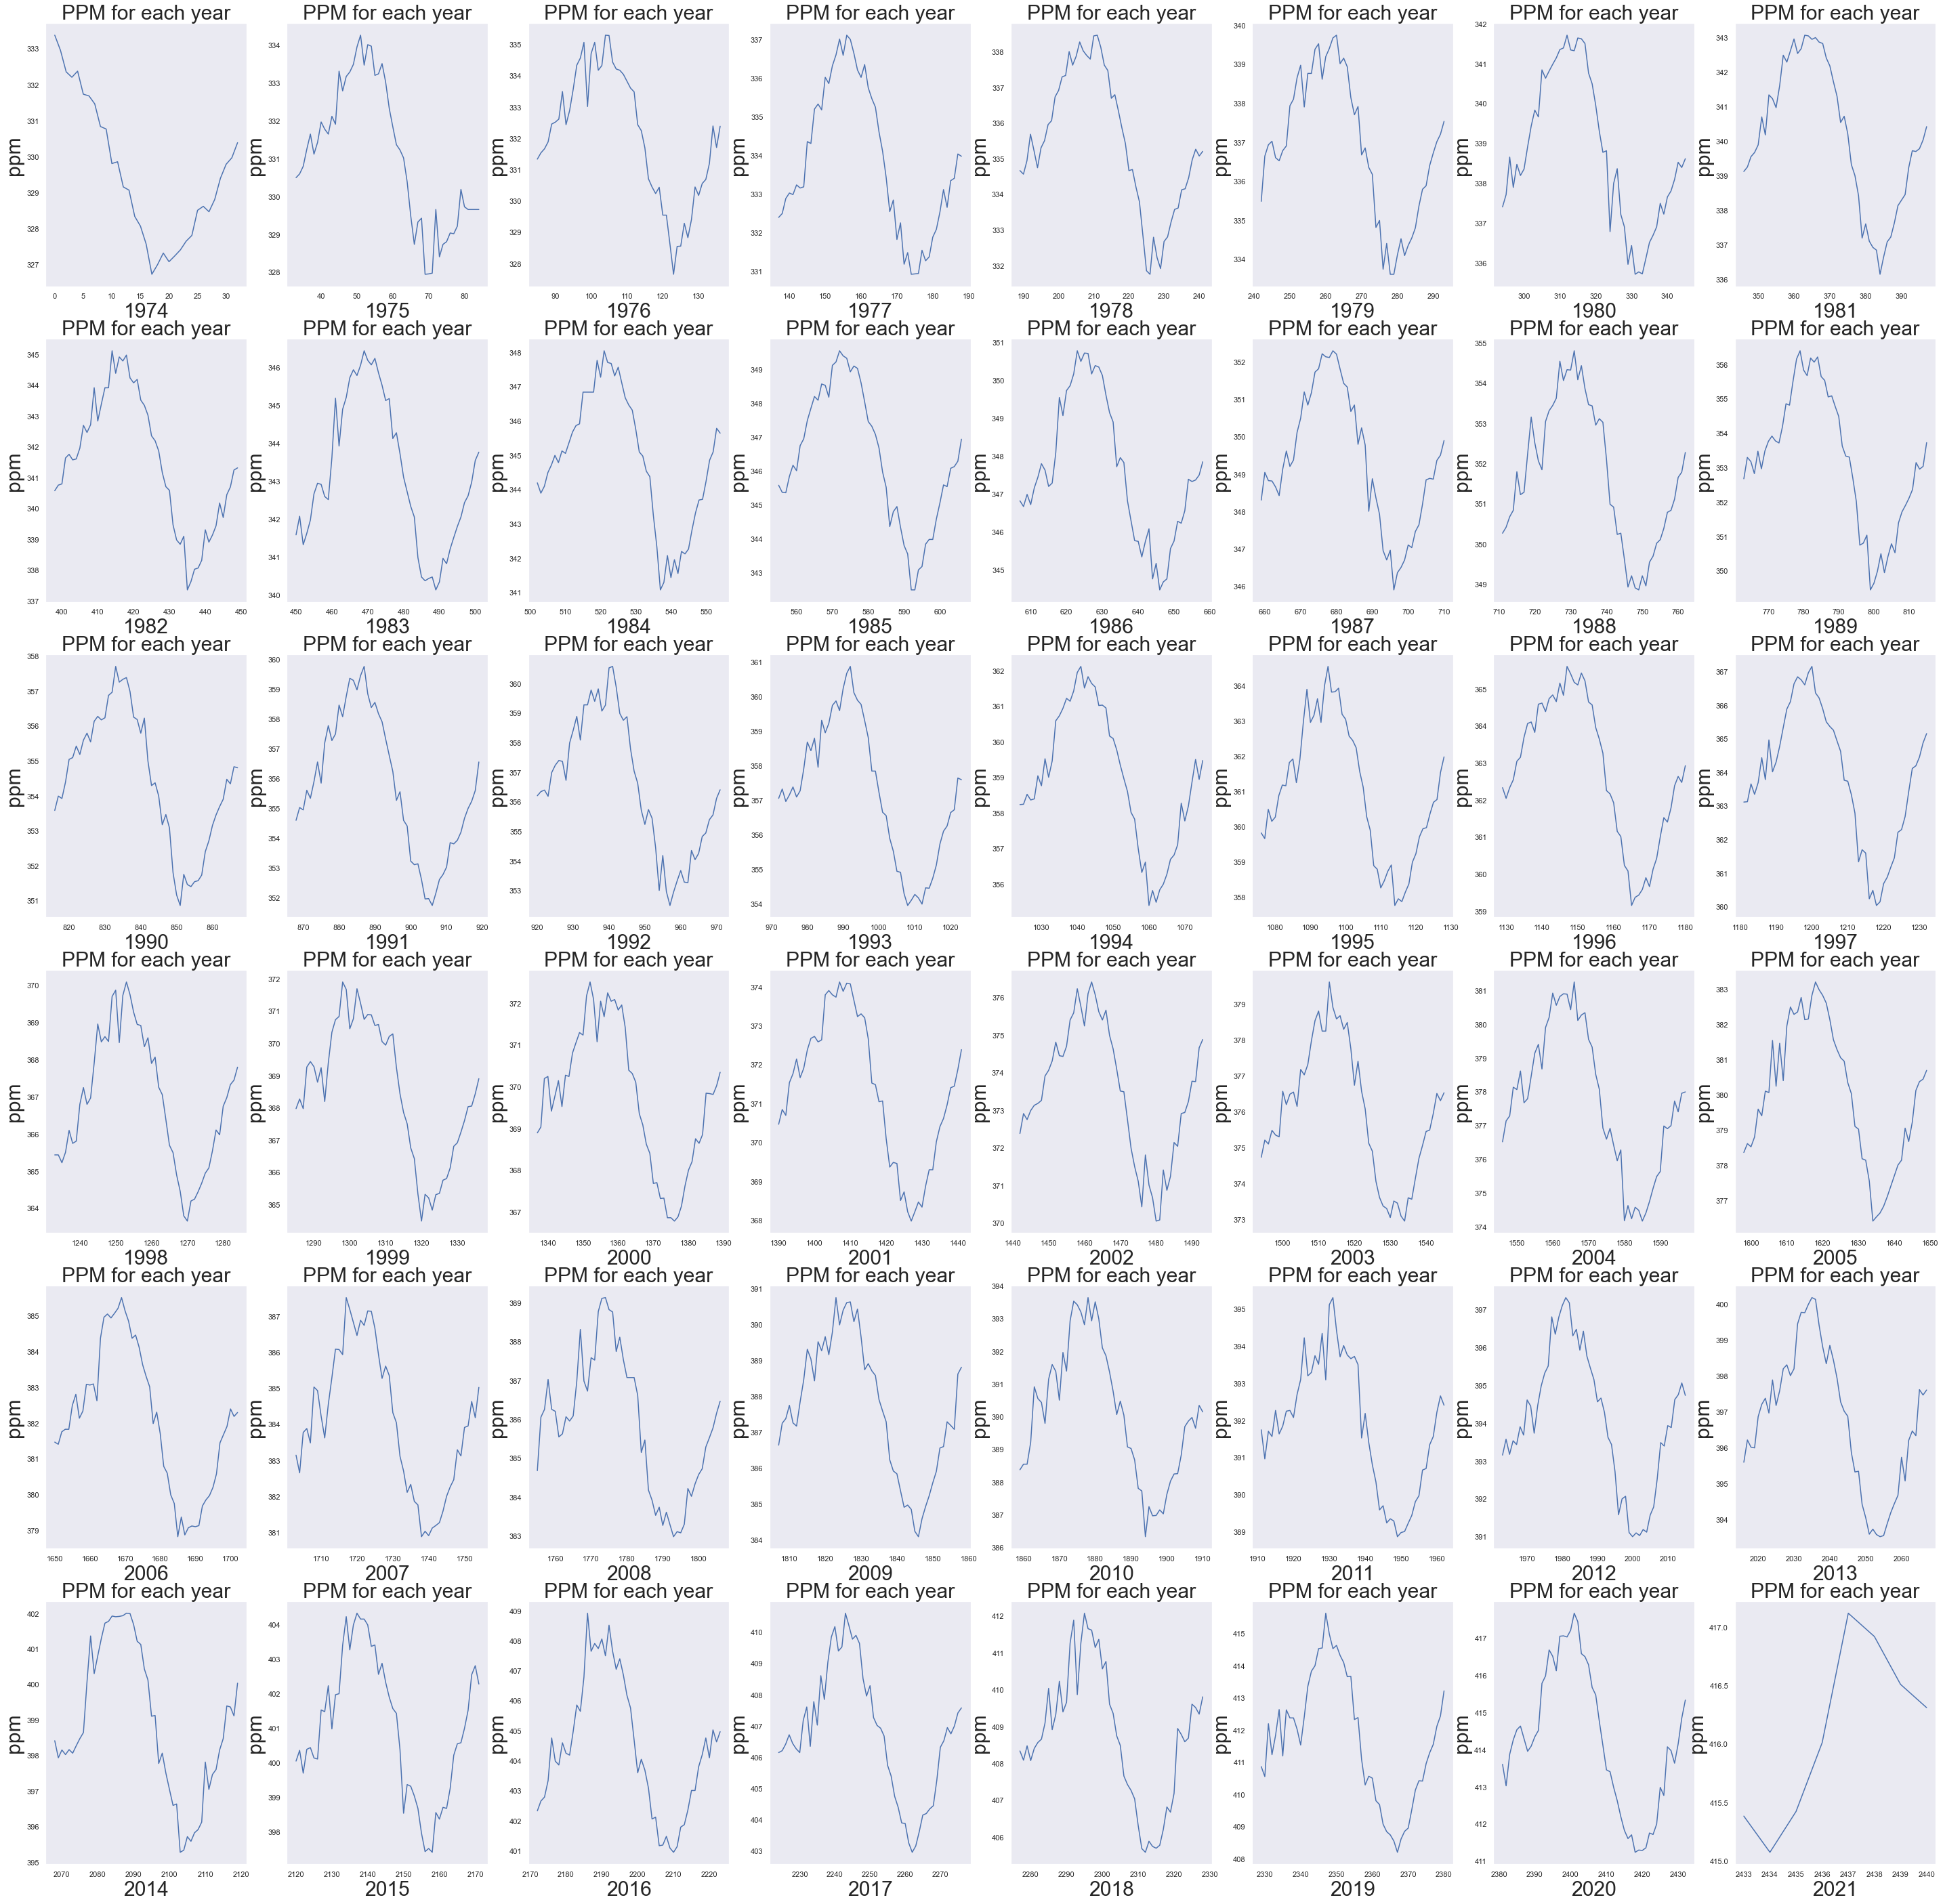

In [15]:
#Plots each each year individually 
years = weekly['year'].unique()

fig, ax = plt.subplots(nrows = 6, ncols = 8, figsize = (50,50))

for index, year in enumerate(years):
    i = index // 8 
    j = index % 8
    current_ax = ax[i][j]
    weekly.loc[weekly['year']  == year, 'average'].plot(ax = current_ax)
    current_ax.set_title('PPM for each year', fontsize = 30)
    current_ax.set_xlabel(year, fontsize = 30)
    current_ax.set_ylabel('ppm', fontsize = 30)

>From these charts we can see that there seasonality since every chart has a very similar shape. 

<Figure size 432x288 with 0 Axes>

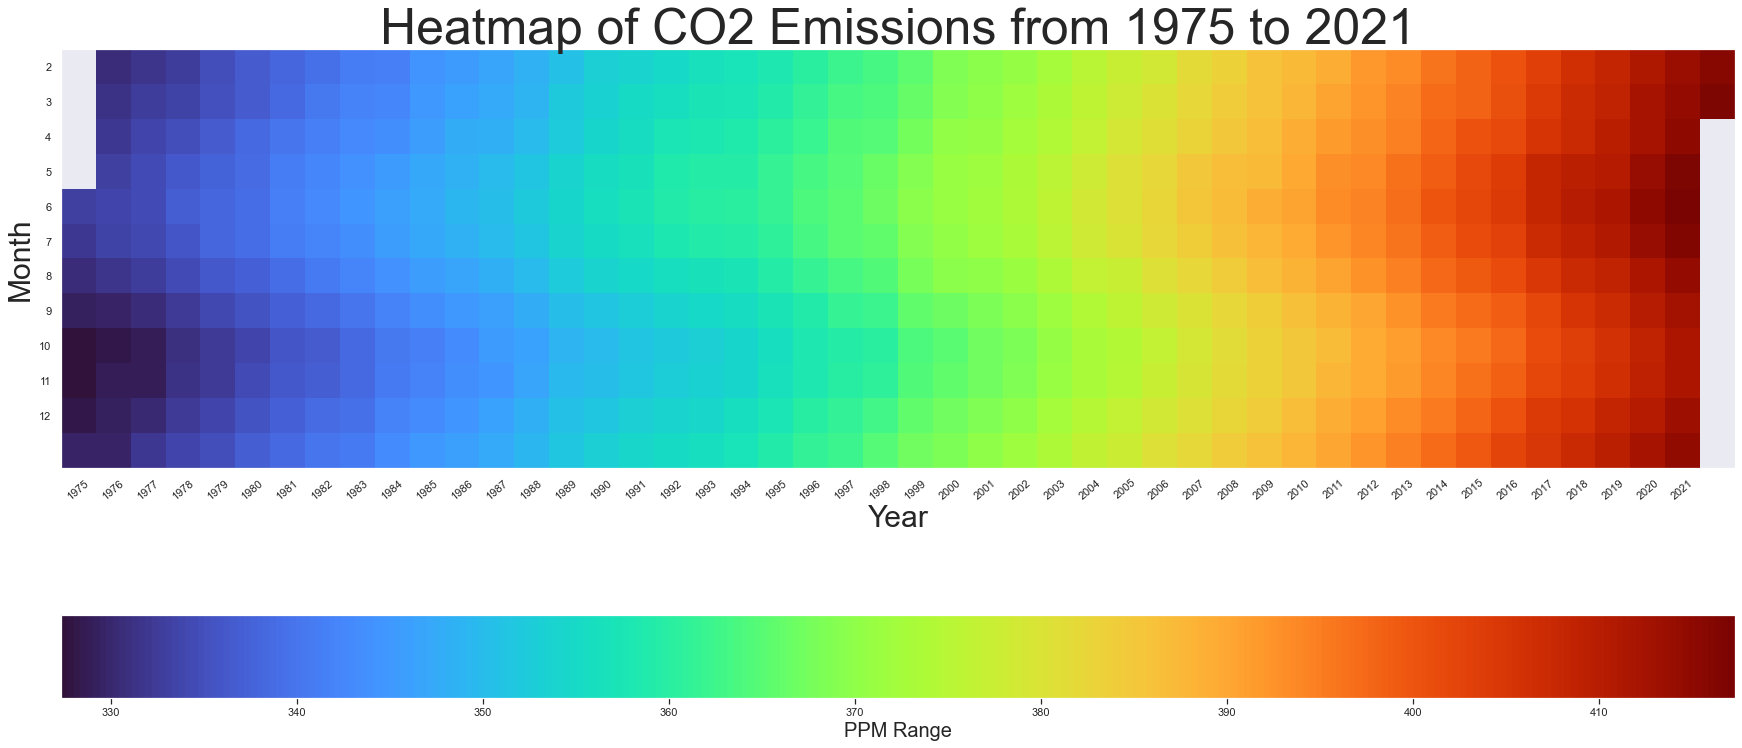

In [16]:
#Creates a heatmap of co2 emissions
co2_matrix = weekly.groupby(['year', 'month'])['average'].mean().unstack().T

fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(30,18))
heatplot = ax.imshow(co2_matrix, cmap='turbo')
ax.set_xticklabels(co2_matrix.columns)
ax.set_yticklabels(co2_matrix.index)

tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_title("Heatmap of CO2 Emissions from 1975 to 2021", fontsize = 50)
ax.tick_params(axis='x', labelrotation = 40)
ax.set_xlabel('Year', fontsize = 30)
ax.set_ylabel('Month', fontsize = 30)  

#legend
cbar = fig.colorbar(heatplot, orientation='horizontal')
cbar.set_label('PPM Range', fontsize = 20);


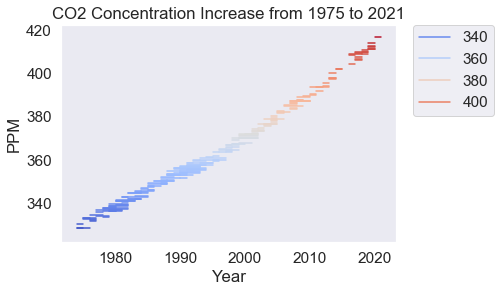

In [17]:
#Lineplot of CO2 Trend Line
sns.set_context("notebook", font_scale=1.4)
sns.lineplot(x = 'year', y = 'average', data = weekly, hue = 'average', palette='coolwarm')
plt.ylabel('PPM') 
plt.xlabel('Year')
plt.title('CO2 Concentration Increase from 1975 to 2021')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

> The above two charts confirm what we saw in preproccessing which is that there is a definite trend upward in the data. 

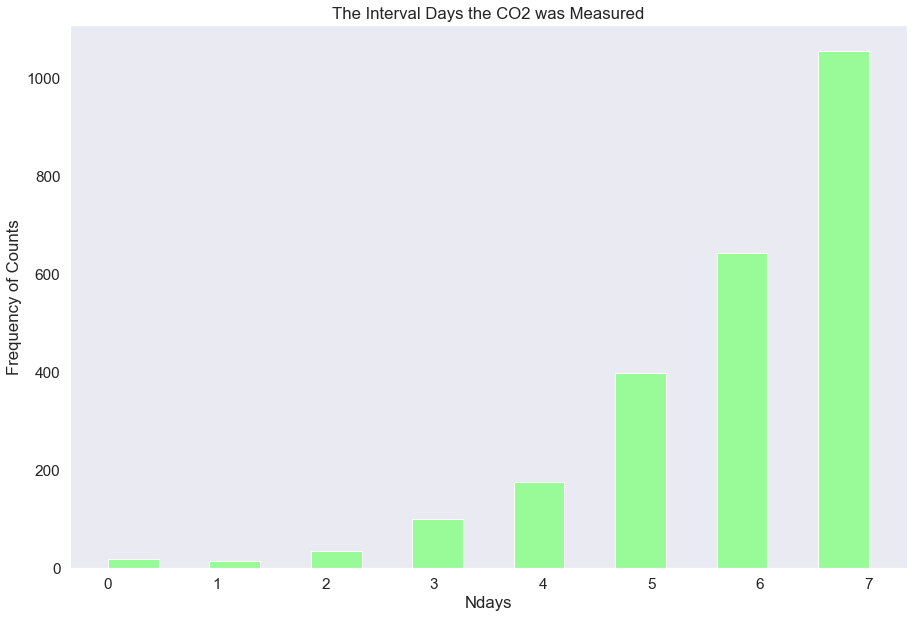

In [18]:
#Graph of Distribution of Collection Days
fig, plt.figure(figsize = (15,10))
plt.hist(weekly.ndays, bins = 15, align='mid', color = 'palegreen' )
plt.xlabel('Ndays')
plt.ylabel('Frequency of Counts')
plt.title('The Interval Days the CO2 was Measured')
plt.show()

>We can from the chart above that for the most part most weekly averages are based on 6-7 days.

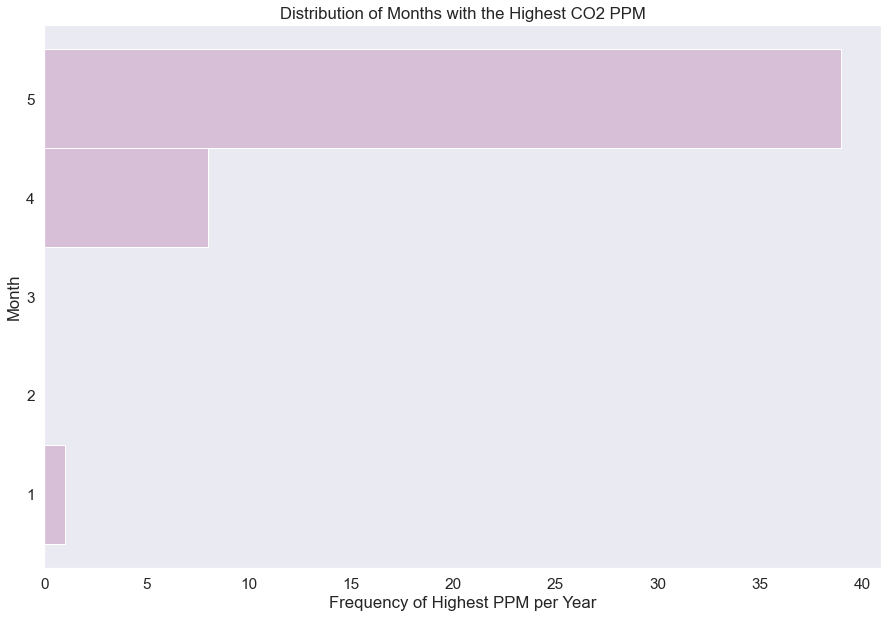

In [19]:
#Distribution of Months with highest CO2 Emissions per year
month_high = weekly.loc[weekly.groupby("year")["average"].idxmax()]
fig = plt.figure(figsize = (15, 10))
plt.hist(month_high.month, bins = 5, align = 'left', orientation='horizontal', color='Thistle')
plt.title('Distribution of Months with the Highest CO2 PPM')
plt.ylabel('Month')
plt.xlabel('Frequency of Highest PPM per Year')
plt.show();

>This chart indicates that May is the month that most frequently has the highest CO2 emissions. We have learned that in the northern fall, winter, and early spring, plants and soils give off CO2, causing levels to rise through May. The continued increase in CO2 and the seasonal cycle are the main features of what is known as the Keeling Curve. 
[Source](https://scitechdaily.com/may-2020-had-the-highest-monthly-atmospheric-co2-reading-ever-recorded/#:~:text=In%20the%20northern%20fall%2C%20winter,vary%20by%20a%20small%20degree) 

#### <span style="color: deepskyblue;">EDA Findings </span> 

[Back to Top](#btt) 

 We now know our data has both a time function trend and seasonality that must be accounted for in preperation for modeling. In the next section, we will look at the rolling mean for multiple windows to find out which is best way to account for these factors.

<a name="model_preparation"></a> 
### <span style="color: deepskyblue;">Model Preperation</span> 

[Back to Top](#btt) 

In [20]:
#We start by setting up variables and alternate dataframes to work form 
avg_weekly = weekly.copy()
avg_weekly = avg_weekly.drop(columns = ['year', 'month', 'day', 'ndays']) 
avg_weekly.set_index('Date', inplace = True) 
avg_week = avg_weekly.copy()
inc_week = avg_weekly.copy() 
avg_week = avg_week.drop(columns = ['increase since 1800'])
inc_week = inc_week.drop(columns = ['average']) 
month_mean = avg_weekly['average'].resample('M').mean()
month_std = avg_weekly['increase since 1800'].resample('M').std()

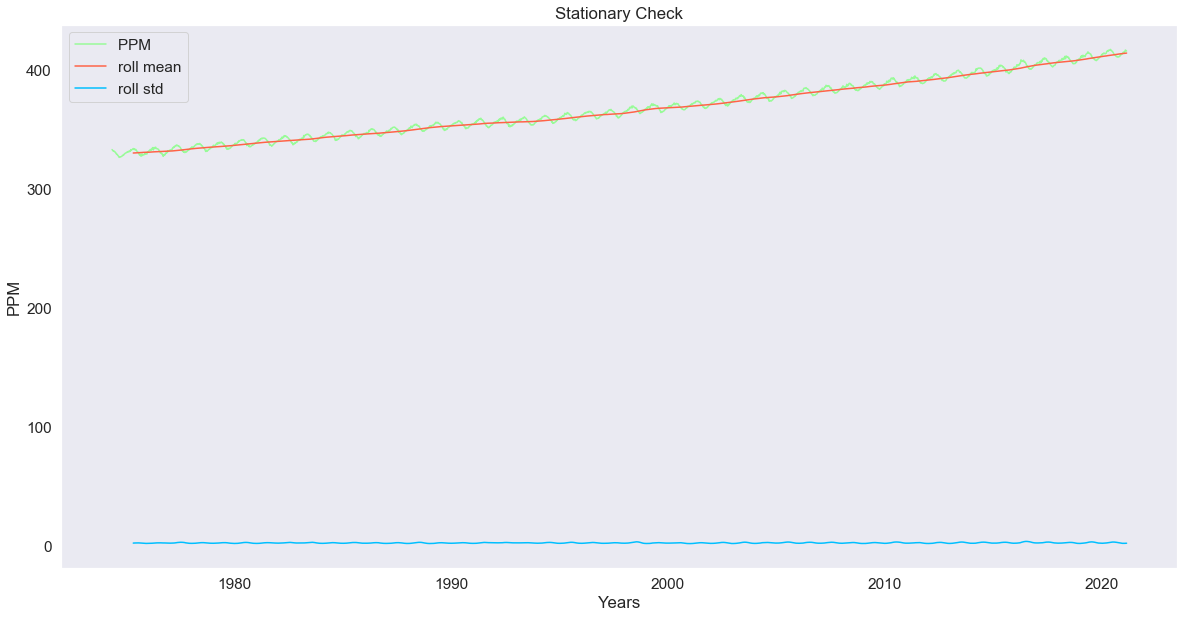

Results of Dickey-Fuller Test: 

Test Statistic                    0.265961
p-value                           0.975728
#Lags Used                       27.000000
Number of Observations Used    2413.000000
Critical Value (1%)              -3.433063
Critical Value (5%)              -2.862739
Critical Value (10%)             -2.567408
dtype: float64


In [21]:
#Here we define a function that will help us confirm when we have succesfully removed the seasonlity from our data
def stats_check(df, winsiz, column):
    
    
    roll_mean = df.rolling(window = winsiz, center = False).mean()
    roll_std = df.rolling(window = winsiz, center = False).std()
    
    
    dftest = adfuller(df[column])
    
    
    fig = plt.figure(figsize = (20,10))
    plt.plot(df, color = 'palegreen', label = 'PPM ')
    plt.plot(roll_mean, color = 'tomato', label = 'roll mean')
    plt.plot(roll_std, color = 'deepskyblue', label = 'roll std')
    plt.legend(loc ='best')
    plt.title('Stationary Check')
    plt.xlabel('Years')
    plt.ylabel('PPM')
    plt.show()
    

    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None 

stats_check(avg_week, 52, 'average')

In [22]:
#Creates logged dataframe 
avg_week_log = np.log(avg_week)

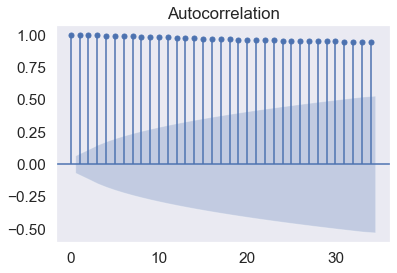

In [23]:
#Runs autocorrelation on base dataframe
plot_acf(weekly.average[:-1], alpha =0.001);

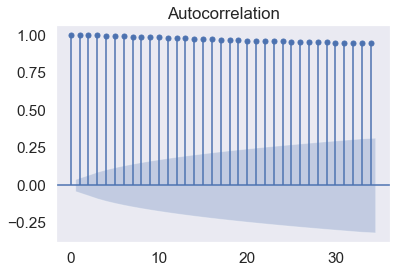

In [24]:
#Runs autcorrelation on logged dataframe
plot_acf(avg_week_log.average[:-1], alpha =0.05);

 >These autocorrelation charts demonstrate how when looking at the data with trend and seaonality,each new data point is highly correlated with the point before it even at a very strict alpha level. 

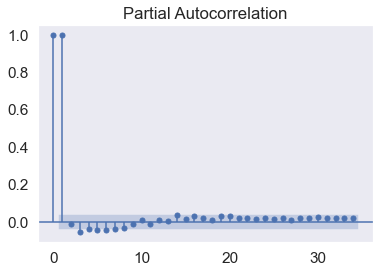

In [25]:
#Runs partial autocorrelation on base dataframe
plot_pacf(weekly.average[:-1], alpha=0.05);

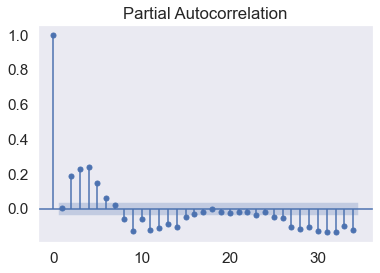

In [26]:
#Runs partial autocorrelation on base dataframe
avg_week_diff = avg_week.diff(1)
avg_week_diff.dropna(inplace = True)
plot_pacf(avg_week_diff.average[:-1], alpha=0.05);

> These PACF charts demonstrate the lags we should look at when modeling including lags 3 thru 6. 

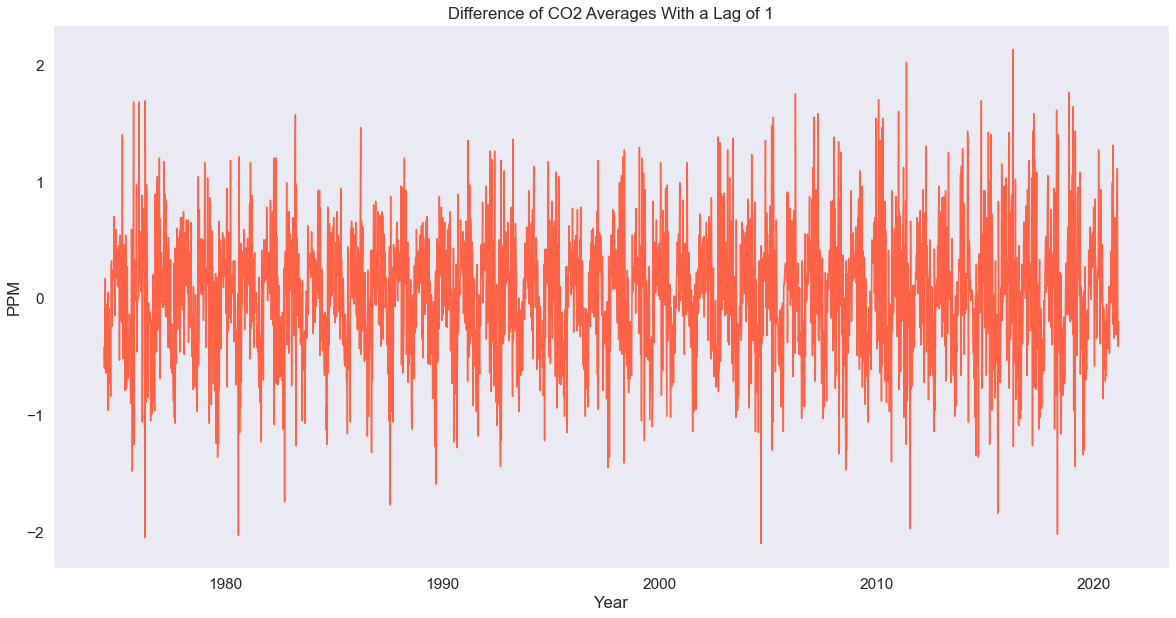

In [27]:
#Create and plots differenced dataframe with a lag of 1
fig = plt.figure(figsize = (20,10))
plt.plot(avg_week_diff, color='tomato')
plt.title('Difference of CO2 Averages With a Lag of 1')
plt.xlabel('Year')
plt.ylabel('PPM')
plt.show();

In [28]:
#Drops NA values from differences dataframe
avg_week_diff.dropna(inplace = True)

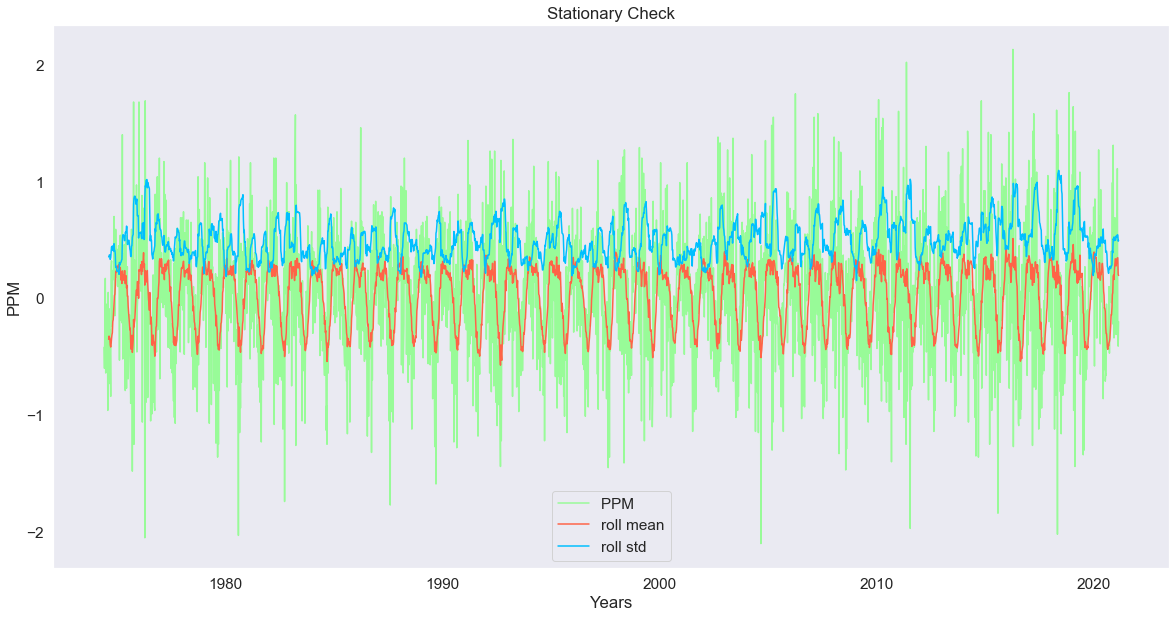

Results of Dickey-Fuller Test: 

Test Statistic                -1.592743e+01
p-value                        7.798566e-29
#Lags Used                     2.700000e+01
Number of Observations Used    2.412000e+03
Critical Value (1%)           -3.433064e+00
Critical Value (5%)           -2.862739e+00
Critical Value (10%)          -2.567408e+00
dtype: float64


In [29]:
#Runs stationary check on differences dataframe
stats_check(avg_week_diff, 12, 'average')

### <span style="color: deepskyblue;">Summary of Steps Done in Data Prep</span> 

[Back to Top](#btt) 

After looking at ACF and PACF charts we now have an idea of what lags will work best for our models. We also performed a Dickey-Fuller test to confirm that differencing did achieve stationary.

<a name="data_modeling"></a> 
## <span style="color: Thistle;">Data Modeling</span> 

[Back to Top](#btt) 

Having explored our data we realize that our data is highly correlated  with a time function and seasonality. When building our models we will be looking for our models to be highly sensitve as the we are looking for factors that only amount for around 3% of the movement in the data. We also looked at PACF, which gave us an idea of the best params to for our models. We will now look at ARMA, ARIMA, and SARIMA to determine the model that best handles this type of data.


<a name="arma"></a> 
### <span style="color: tomato;">ARMA</span>  
 
We started with ARMA as a baseline. For this we used two versions of our data in a stationary form using different params found by doing the PACF which found that 3, 1, 6, and 2 were statistically significant lags. 

[Back to Top](#btt) 

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
#Split the data for training set
diff_avg_week_train = avg_week_diff.average[:round(len(avg_week_diff) * 0.8)]
diff_avg_week_test = avg_week_diff.average[round(len(avg_week_diff) * 0.8):]
len(diff_avg_week_test)

488

In [32]:
#Split the data for the testing set
avg_week_train = avg_week.average[:round(len(avg_week) * 0.8)]
avg_week_test = avg_week.average[round(len(avg_week) * 0.8):]
len(avg_week_test)

488

In [33]:
#Run base ARMA model with 3,1 params
mod_arma_1 = ARMA(diff_avg_week_train, (3, 1))
res_arma_1 = mod_arma_1.fit(disp=1)
res_arma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                average   No. Observations:                 1952
Model:                     ARMA(3, 1)   Log Likelihood               -1437.875
Method:                       css-mle   S.D. of innovations              0.505
Date:                Thu, 11 Mar 2021   AIC                           2887.751
Time:                        21:04:18   BIC                           2921.210
Sample:                    05-26-1974   HQIC                          2900.051
                         - 10-16-2011                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0272      0.029      0.940      0.347      -0.030       0.084
ar.L1.average     0.4798      0.035     13.804      0.000       0.412       0.548
ar.L2.average     0.1912      0.024      7.827      0.000       0.143       0.239
ar.L3.average     0.1676      0.025      6.751      0.000       0.119       0.216
ma.L1.average    -0.5899      0.029    -20.666      0.000      -0.646      -0.534
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1117           -0.0000j            1.1117           -0.0000
AR.2           -1.1261           -2.0244j            2.3165           -0.3308
AR.3           -1.1261           +2.0244j            2.3165            0.3308
MA.1            1.6952           +0.0000j            1.6952            0.0000
-----------------------------------------------------------------------------
"""

In [34]:
#Run base ARMA model with 6,2 params
mod_arma_2 = ARMA(diff_avg_week_train, (6, 2))
res_arma_2 = mod_arma_2.fit(disp=1)
res_arma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                average   No. Observations:                 1952
Model:                     ARMA(6, 2)   Log Likelihood               -1248.044
Method:                       css-mle   S.D. of innovations              0.458
Date:                Thu, 11 Mar 2021   AIC                           2516.088
Time:                        21:05:44   BIC                           2571.854
Sample:                    05-26-1974   HQIC                          2536.590
                         - 10-16-2011                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0316      0.003     11.269      0.000       0.026       0.037
ar.L1.average     1.6641      0.023     72.341      0.000       1.619       1.709
ar.L2.average    -0.4854      0.044    -11.063      0.000      -0.571      -0.399
ar.L3.average    -0.0964      0.045     -2.137      0.033      -0.185      -0.008
ar.L4.average    -0.0218      0.045     -0.485      0.628      -0.110       0.066
ar.L5.average    -0.1494      0.044     -3.407      0.001      -0.235      -0.063
ar.L6.average     0.0686      0.023      2.985      0.003       0.024       0.114
ma.L1.average    -1.9715      0.005   -417.797      0.000      -1.981      -1.962
ma.L2.average     0.9770      0.005    202.779      0.000       0.968       0.986
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9950           -0.1214j            1.0023           -0.0193
AR.2            0.9950           +0.1214j            1.0023            0.0193
AR.3           -1.8063           -0.0000j            1.8063           -0.5000
AR.4           -0.2580           -1.7704j            1.7891           -0.2730
AR.5           -0.2580           +1.7704j            1.7891            0.2730
AR.6            2.5106           -0.0000j            2.5106           -0.0000
MA.1            1.0090           -0.0743j            1.0117           -0.0117
MA.2            1.0090           +0.0743j            1.0117            0.0117
-----------------------------------------------------------------------------
"""

In [35]:
#Creates function to check metrics for models that return MSE, RMSE, MAE, & AIC
def check_metrics_a (model):
    print('MSE:', mean_squared_error(diff_avg_week_test, model.forecast(488)[0]))
    print('RMSE:', np.sqrt(mean_squared_error(diff_avg_week_test, model.forecast(488)[0])))
    print('MAE:', mean_absolute_error(diff_avg_week_test, model.forecast(488)[0]))
    print('AIC:', model.aic) 

check_metrics_a (res_arma_1)

MSE: 0.3765442348642141
RMSE: 0.6136320028031573
MAE: 0.4757543081645101
AIC: 2887.750545573768


In [36]:
#Runs metric check on second model
best_arma=check_metrics_a(res_arma_2)

MSE: 0.32666003703475016
RMSE: 0.5715418069002041
MAE: 0.43672852358752723
AIC: 2516.0882981959876


In [37]:
#Forecase with both arma models
undo_diff1 = (res_arma_1.forecast(488)[0]).cumsum() 
undo_diff1 += 389.23

undo_diff2 = (res_arma_2.forecast(488)[0]).cumsum() 
undo_diff2 += 389.23

In [38]:
#Creates function to plot forecast 
def run_line_plot (model, truec, predc):
    fig, ax = plt.subplots(figsize=(11,7))
    ax.plot(avg_week, color=truec)
    ax.plot(avg_week.iloc[-488:].index, model, linewidth=4, color=predc)
    plt.xlabel('Year',fontsize=20)
    plt.ylabel('PPM', fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=12)
    plt.title('PPM Predictions', fontsize=20)
    plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large');

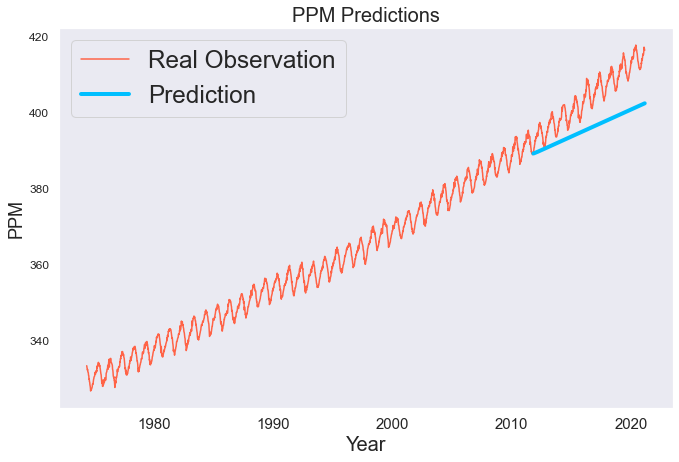

In [39]:
#Plots line graph for ARMA model 1
run_line_plot (undo_diff1, 'tomato', 'deepskyblue')

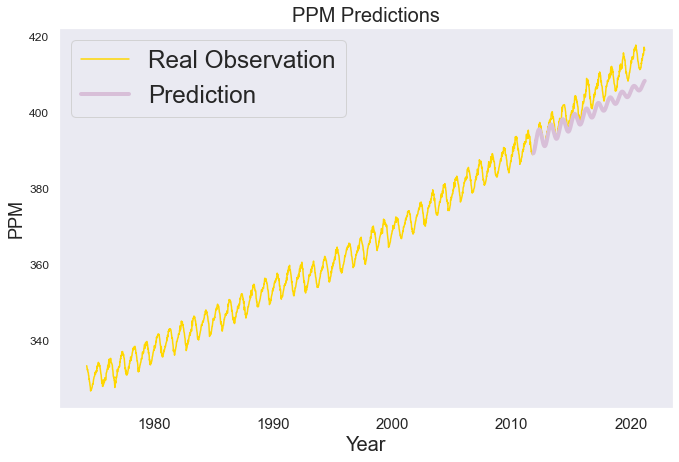

In [40]:
#Plots forcase for ARMA model 2
run_line_plot (undo_diff2, 'gold', 'thistle')

#### <span style="color: tomato;">Findings from ARMA </span>
Our ARMA models both performed decently, however our model using the params 6 and 2 performed the best with MSE: 0.32666003703475016, RMSE: 0.5715418069002041, MAE: 0.43672852358752723, and AIC: 2516.0882981959876. It should also be noted that other params were looked at prior to this final notebook but these were the best performing of all the ones looked at. 

<a name="arima"></a> 
### <span style="color: tomato;">ARIMA</span>  

Next, we will take a look at ARIMA which will take in our undifferenced data and difference it in a different way. For this reason its worth looking at using the same params we using for ARMA

[Back to Top](#btt) 

In [41]:
#Creates function to check metrics for models that return MSE, RMSE, MAE, & AIC but dont use the difference 
def check_metrics_b (model):
    print('MSE:', mean_squared_error(avg_week_test, model.forecast(488)[0]))
    print('RMSE:', np.sqrt(mean_squared_error(avg_week_test, model.forecast(488)[0])))
    print('MAE:', mean_absolute_error(avg_week_test, model.forecast(488)[0]))
    print('AIC:', model.aic) 

In [42]:
#Fits data to ARIMA model using 3,1,0
avg_week_arima = ARIMA(avg_week_train, order=(3,1,0))
avg_week_arimafit = avg_week_arima.fit(disp=1)
avg_week_arimafit.forecast(488)[0]

check_metrics_b(avg_week_arimafit)

MSE: 71.949160596751
RMSE: 8.48228510466083
MAE: 7.695227471638541
AIC: 3010.222478369647


In [43]:
#Fits data to ARIMA model using 6,2,0
avg_week_arima = ARIMA(avg_week_train, order=(6,2,0))
avg_week_arimafit_2 = avg_week_arima.fit(disp=1)
avg_week_arimafit_2.forecast(488)[0] 

check_metrics_b(avg_week_arimafit_2) 

MSE: 47.8597581145486
RMSE: 6.918074740456957
MAE: 6.347086718133562
AIC: 2930.642878461285


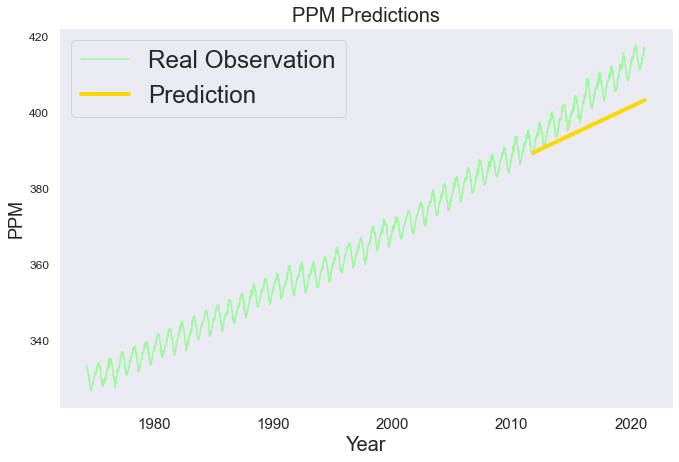

In [44]:
#Plots ARIMA model using 3,1,0 params
def plot_pred (model, truec, predc): 
    fig, ax = plt.subplots(figsize=(11,7))
    ax.plot(avg_week, color=truec)
    ax.plot(avg_week.iloc[-488:].index, model.forecast(488)[0], linewidth=4, color=predc)
    plt.xlabel('Year',fontsize=20)
    plt.ylabel('PPM', fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=12)
    plt.title('PPM Predictions', fontsize=20)
    plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large'); 

plot_pred (avg_week_arimafit, 'palegreen', 'gold')

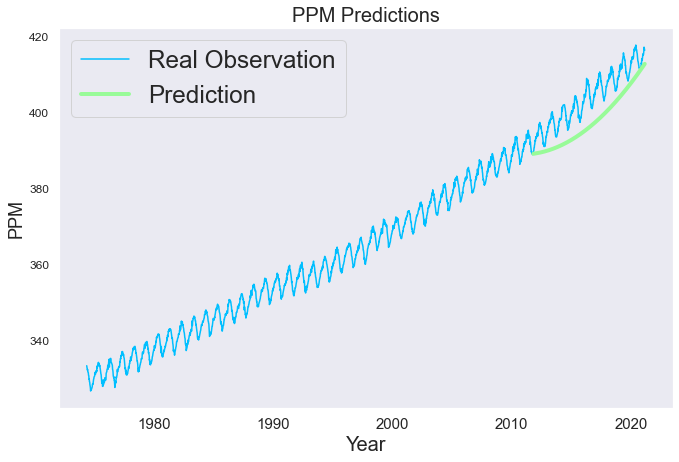

In [45]:
#Plots ARIMA model using 6,2,0 params
plot_pred (avg_week_arimafit_2, 'deepskyblue', 'palegreen')

In [46]:
#Function to use gridsearch to find the best params 
orderlist = []
aiclist = []
rmselist = []
badlist = []
for p in range(1,3):
    for d in range(1,3):
        for q in range(1,5):
            try: 
                ordernow = (p,d,q)
                arimax_now = ARIMA(avg_week_train, order=ordernow).fit(disp=0)
                orderlist.append(ordernow)
                aiclist.append(arimax_now.aic)
                rmselist.append(np.sqrt(mean_squared_error(avg_week_test, arimax_now.forecast(488)[0])))
            except: 
                badlist.append(ordernow)
                continue

In [47]:
#Puts the best params into a data frame which we thhen manually iterated thru 
df_arima = pd.DataFrame()
df_arima['order'], df_arima['aic'], df_arima['rmse'] = orderlist, aiclist, rmselist
df_arima.sort_values('aic', inplace=True) 
df_arima.head(5)

,order,aic,rmse
11,"(2, 1, 4)",2593.245016,5.234041
10,"(2, 1, 3)",2720.235249,6.838981
9,"(2, 1, 2)",2763.197917,7.502834
3,"(1, 1, 4)",2785.036904,8.245827
2,"(1, 1, 3)",2806.596312,8.478804


In [48]:
#Plots ARIMA model using 2,1,6 params
best_arima_2 = ARIMA(avg_week_train, order=(2,1,6))
best_arima_2 = best_arima_2.fit(disp=1)
best_arima_2.forecast(488)[0]

best_arima = check_metrics_b(best_arima_2) 

MSE: 25.806366776134485
RMSE: 5.079996729933444
MAE: 4.285382813605817
AIC: 2495.7189453567366


>Despite what the gridsearch is displaying as the best, in the working notebook we found 2,1,6 to be best params for ARIMA.

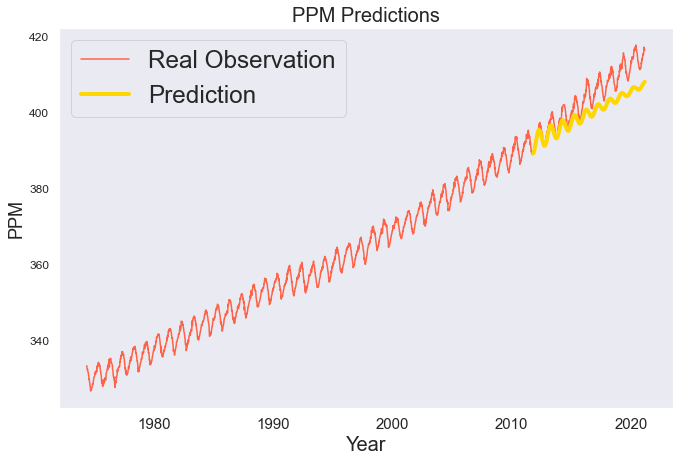

In [49]:
#Plots ARIMA model using 2,1,6 params
plot_pred (best_arima_2, 'tomato', 'gold')

#### <span style="color: tomato;">Findings from ARIMA </span>
Our ARIMA models all performed decently, however they did not perform as well as our ARIMA models. The model using the params 2,1,6 performed the best with MSE: 25.806366776134485, RMSE: 5.079996729933444, MAE: 4.285382813605817, and AIC: 2495.7189453567366. It should also be noted that other params were looked at prior to this final notebook but these were the best performing of all the ones looked at. 

<a name="sarima"></a> 
### <span style="color: tomato;">SARIMA</span>  

Lastly, we will be looking at SARIMA due the seasonality inherant in our data. We will be using the same a params used in the previous two types of models.

[Back to Top](#btt) 

In [50]:
#Create and fit two SARIMA models using previous params
avg_sarima_1 = sm.tsa.statespace.SARIMAX(endog = avg_week_train, order=(3,1,0))
avg_sarimafit_1 = avg_sarima_1.fit()

avg_sarima_2 = sm.tsa.statespace.SARIMAX(endog = avg_week_train, order=(6,2,0))
avg_sarimafit_2 = avg_sarima_2.fit()

In [51]:
#Creates check metrics function for SARIMA and check metrics of first model
def check_metrics_c (model):
    print('MSE:', mean_squared_error(avg_week_test, model.forecast(488)))
    print('RMSE:', np.sqrt(mean_squared_error(avg_week_test, model.forecast(488))))
    print('MAE:', mean_absolute_error(avg_week_test, model.forecast(488)))
     

check_metrics_c (avg_sarimafit_1)

MSE: 262.47345452050547
RMSE: 16.201032514025318
MAE: 14.56775750512821


In [52]:
#Creates check metrics function for SARIMA and check metrics of second model
best_sarima = check_metrics_c (avg_sarimafit_2)

MSE: 207.00824242995583
RMSE: 14.387781011328878
MAE: 13.037543070119849


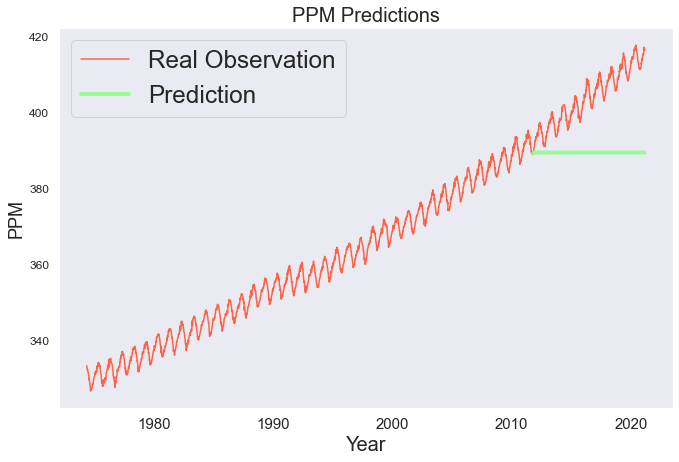

In [53]:
#Plots the line for SARIMA with plot 3,1,0
def plot_pred (model, truec, predc): 
    fig, ax = plt.subplots(figsize=(11,7))
    ax.plot(avg_week, color=truec)
    ax.plot(avg_week.iloc[-488:].index, model.forecast(488), linewidth=4, color=predc)
    plt.xlabel('Year',fontsize=20)
    plt.ylabel('PPM', fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=12)
    plt.title('PPM Predictions', fontsize=20)
    plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large'); 

plot_pred (avg_sarimafit_1, 'tomato', 'palegreen')

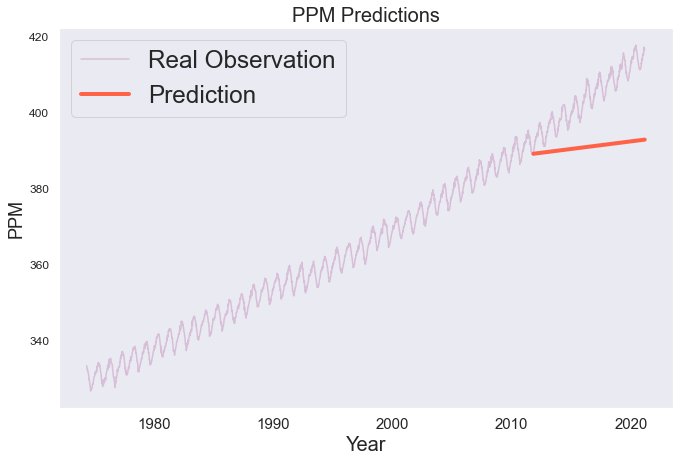

In [54]:
#Plots the line for SARIMA with plot 6,2,0
plot_pred (avg_sarimafit_2, 'thistle', 'tomato')

In [55]:
#Uses auto arima to find best params for SARIMA 
m_auto = pm.auto_arima(avg_week_train, start_p=1, start_d=1, start_q=1, max_p=10, max_d=5, max_q=10,
                             seasonal = False,
                             d=None, D=None, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3137.966, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3175.762, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3177.662, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3177.690, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3179.132, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2927.758, Time=1.46 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3103.435, Time=0.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2887.751, Time=1.45 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3010.223, Time=0.59 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2855.512, Time=1.46 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2901.393, Time=0.84 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2847.777, Time=3.22 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2852.008, Time=1.15 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=2848.129, Time=2.92 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept

In [56]:
#Run Sarima using best params from auto arima 
best_sarima_p = sm.tsa.statespace.SARIMAX(endog = avg_week_train, order=(6,1,3))
best_sarima_p = best_sarima_p.fit() 

check_metrics_c (best_sarima_p)

MSE: 222.07466724459587
RMSE: 14.902169883765112
MAE: 13.108136921608239


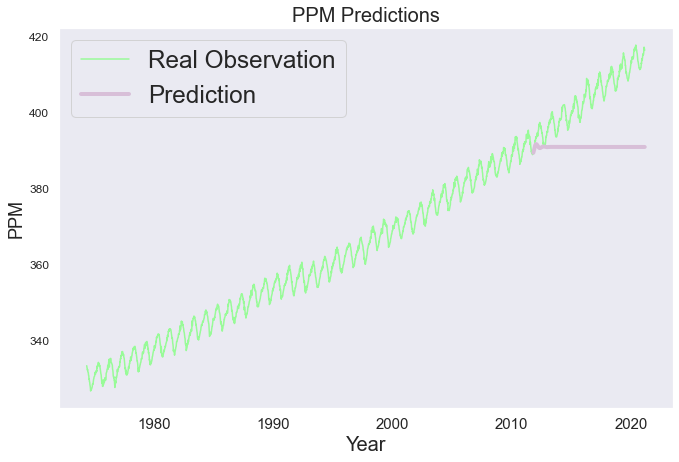

In [57]:
plot_pred (best_sarima_p, 'palegreen', 'thistle')

#### <span style="color: tomato;">Findings from SARIMA </span>
Our SARIMA models also did not perform as well as the ARMA models we started with. The best metrics we were able to achieve with SARIMA were MSE: 207.00824242995583, RMSE: 14.387781011328878, and MAE: 13.037543070119849.

<a name="evaluation"></a> 
## <span style="color: gold;"> Evaluation </span> 

[Back to Top](#btt)  

AIC is particularly valuable for time series, because time series analysis' most valuable data is often the most recent, which is stuck in the validation and test sets. For this reason we will use AIC as our key metric. Based on AIC our best model our second ARIMA model, which is what we will to make our predictions.  

In [58]:
#Best ARMA Metrics
best_arma=check_metrics_a(res_arma_2)

MSE: 0.32666003703475016
RMSE: 0.5715418069002041
MAE: 0.43672852358752723
AIC: 2516.0882981959876


In [59]:
#Best ARIMA Metrics
best_arima = check_metrics_b(best_arima_2) 

MSE: 25.806366776134485
RMSE: 5.079996729933444
MAE: 4.285382813605817
AIC: 2495.7189453567366


In [60]:
#Best SARIMA AIC
sarima_best = sm.tsa.statespace.SARIMAX(endog= avg_week_train, order=(6,2,6)) 
sarima_best = sarima_best.fit() 
print('AIC:', sarima_best.aic)

AIC: 2823.910770142007


> When we compare this model to our base model, we see that the ARIMA model out performs our base when it comes to AIC for this reason we can be reasonably certain that our model will be able to generalize when we apply it to the full data set.

In [61]:
#Metric of our ARIMA model
best_arima = check_metrics_b(best_arima_2) 

MSE: 25.806366776134485
RMSE: 5.079996729933444
MAE: 4.285382813605817
AIC: 2495.7189453567366


In [62]:
#Metric of our first ARMA model 
check_metrics_a(res_arma_1)

MSE: 0.3765442348642141
RMSE: 0.6136320028031573
MAE: 0.4757543081645101
AIC: 2887.750545573768


As can be seen below our prediction appears to be in line with the current ground truth data available. This indicates that our model is well fit to the dat although it does not bode well for our planet if this model end up being accurate.

In [63]:
#Creates ARIMA model for all data and fits it to the model using the params for our second tested model
all_arima = ARIMA(avg_week, order=(2,1,6))
all_arimafit = all_arima.fit(disp=0) 
pred = all_arimafit.predict(start = '2021-01-31', end = '2030-01-31', dynamic=False)
pred = pred.cumsum() + 416.3

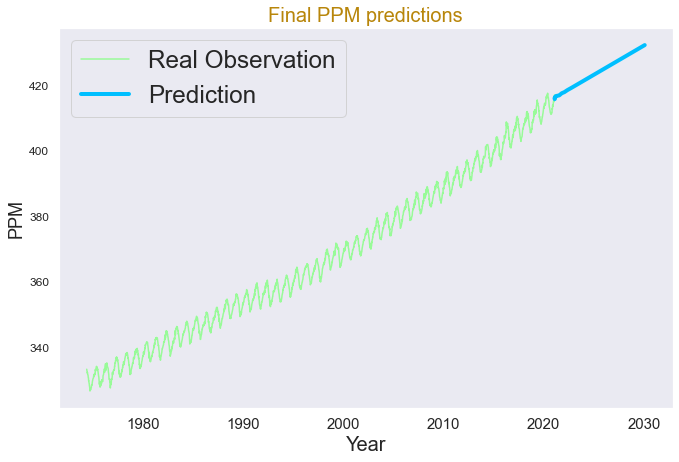

In [64]:
#Graphs the predictions
fig, ax = plt.subplots(figsize=(11,7))
ax.plot(avg_week, color='palegreen')
ax.plot(pred, linewidth=4, color='deepskyblue')
plt.xlabel('Year',fontsize=20)
plt.ylabel('PPM', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.title('Final PPM predictions', fontsize=20, color='darkgoldenrod')
plt.legend(('Real Observation', 'Prediction'), loc='best', fontsize='x-large');

<a name="conclusion"></a> 
## <span style="color: palegreen;"> Conclusions </span> 

[Back to Top](#btt)  

Given the current trend our model indicated that we as a species are in quite the predicament should we as a species but especially in developed countries not do more to curb this trend. Having tried multiple models, we found that there are certain limitations we would like to address in the future if psossible. However, none painted a picture that was not dire. That being said, as we know the bigges factor is whether or not our prediction come true is human activity. For this reason, in future iterations it would be helpful to take in exogenous variable that look to account for this. This would help better address the question of exactly how we go about flattening the trend.
